Adopcion de una mascota

In [2]:
import FuzzySystem as fs
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf


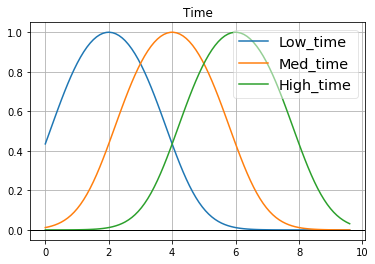

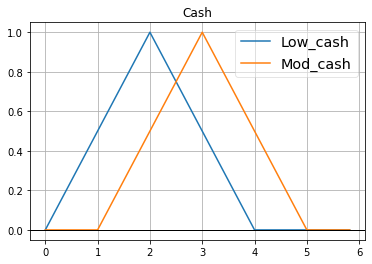

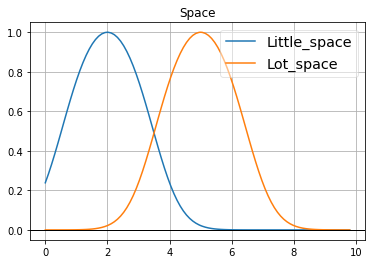

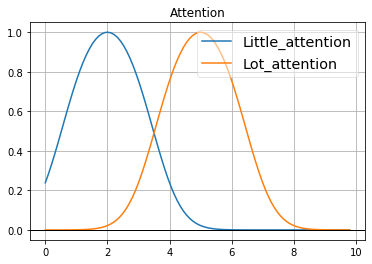

In [8]:
#INPUT#
#Tiempo
time_low = FuzzySet('Low_time',Tanhmf([2.5,2]))
time_med = FuzzySet('Med_time',Tanhmf([2.5,4]))
time_high = FuzzySet('High_time',Tanhmf([2.5,6]))

time = FuzzyVariable('Time',[time_low,time_med,time_high]
                     ,universe=[0,10])
time.show()

#Gastos
cash_low = FuzzySet('Low_cash',Trimf([0,2,4]))
cash_mod = FuzzySet('Mod_cash',Trimf([1,3,5]))

cash = FuzzyVariable('Cash',[cash_low,cash_mod],universe = [0,6])
cash.show()

#Espacio
space_l = FuzzySet('Little_space',Tanhmf([2,2]))
space_lot = FuzzySet('Lot_space',Tanhmf([2,5]))

space = FuzzyVariable('Space',[space_l,space_lot],universe = [0,10])
space.show()

#Atencion
atten_l = FuzzySet('Little_attention',Tanhmf([2,2]))
atten_lot = FuzzySet('Lot_attention',Tanhmf([2,5]))

atten = FuzzyVariable('Attention',[atten_l,atten_lot],universe = [0,10])
atten.show()

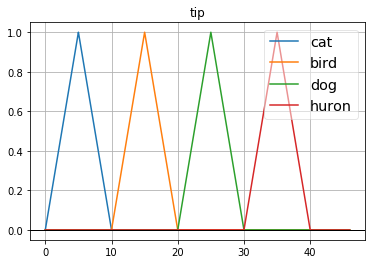

In [12]:
#OUTPUT
masc_cat = FuzzySet('cat', Trimf([0,5,10]))
masc_bird = FuzzySet('bird', Trimf([10,15,20]))
masc_dog = FuzzySet('dog', Trimf([20,25,30]))
masc_huron = FuzzySet('huron', Trimf([30,35,40]))
masc = FuzzyVariable('tip', [masc_cat, masc_bird, masc_dog, masc_huron], 
                    universe=[0, 50])
masc.show()

In [14]:
#Rules
ant1 = ant1  = Antecedent(time['Low_time'] | cash['Low_cash'] | space['Little_space'] |
                         atten['Little_attention'])
cont1 = Consequent([masc['bird']])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(time['Med_time'] & cash['Mod_cash'])
cont2 = Consequent([masc['cat']])
rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(time['High_time'] & cash['Mod_cash'] & space['Lot_space'])
cont3 = Consequent([masc['dog']])
rule3 = FuzzyRule(ant3, cont3)

ant4  = Antecedent(time['High_time'] | cash['Mod_cash'] | space['Lot_space'] |
                         atten['Lot_attention'])
cont4 = Consequent([masc['huron']])
rule4 = FuzzyRule(ant4, cont4)

fis = FuzzyInferenceSystem([rule1, rule2, rule3, rule4], and_op='prod', or_op='sum')

#FIS Evaluation

inputs = {'time':5.3, 'cash': 4.5, 'space': 3, 'atten':3}
result = fis.eval(inputs)
#print(result)


Evaluation of FIS with inputs:
time: 5.3
cash: 4.5
space: 3
atten: 3


KeyError: 'Time'

In [ ]:
result.show()

In [ ]:
from FuzzySystem.Defuzzifier import Centroid
result.show(Centroid)
Centroid(result).eval()

In [ ]:
from FuzzySystem.Defuzzifier import  CenterOfSets, FirstOfMaximum, LastOfMaximum, LastOfMaximum, ModifiedHeights, Heights, MeanOfMaximum

Defuzzification_methods = [Centroid,CenterOfSets,  Heights, ModifiedHeights, MeanOfMaximum, LastOfMaximum, FirstOfMaximum]

for dm in Defuzzification_methods:
    print(dm.name)
    print("{:>5}\n".format(str(dm(result).eval())))

In [ ]:
result.show()